In [1]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud

In [2]:
def parse_data(filename, _sim, _word):
    with open(filename, 'r') as f:
        for line in f:
            if line:
                try:
                    s = re.split(r'\t', line)
                    obj = json.loads(s[1])
                    similarity = round(obj['similarity'], 0)

                    if (similarity < 50):
                        continue

                    if similarity not in _sim:
                        _sim[similarity] = 0
                    _sim[similarity] += 1
                    
                    word_list = obj['matched']
                    for word in word_list:
                        str_word = str(word)
                        if str_word not in _word:
                            _word[str_word] = 0
                        _word[str_word] +=  + 1
                except:
                    continue

In [3]:
%%time

_sim = {}
_word = {}

data_file = '../usersimilarity-final'
parse_data(data_file, _sim, _word)

CPU times: user 2.31 s, sys: 43.8 ms, total: 2.35 s
Wall time: 2.35 s


In [4]:
_sim

{50.0: 69,
 51.0: 66,
 52.0: 54,
 53.0: 54,
 54.0: 67,
 55.0: 47,
 56.0: 56,
 57.0: 58,
 58.0: 54,
 59.0: 42,
 60.0: 42,
 61.0: 46,
 62.0: 48,
 63.0: 49,
 64.0: 61,
 65.0: 71,
 66.0: 65,
 67.0: 83,
 68.0: 122,
 69.0: 149,
 70.0: 189,
 71.0: 204,
 72.0: 237,
 73.0: 204,
 74.0: 165,
 75.0: 150,
 76.0: 89,
 77.0: 61,
 78.0: 21,
 79.0: 9,
 80.0: 1,
 81.0: 2}

In [5]:
len(_sim)

32

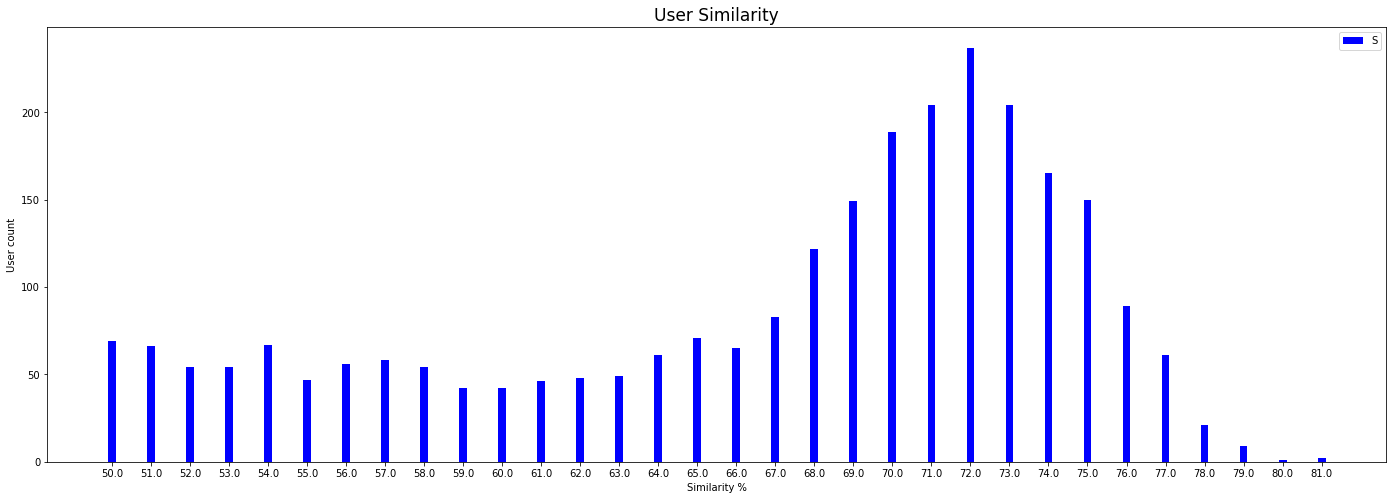

In [6]:
plt.figure(figsize=(24,8))
X = np.arange(len(_sim))
ax = plt.subplot(111)
ax.bar(X, _sim.values(), width=0.2, color='b', align='center')
ax.legend('Similarity')
plt.xticks(X, _sim.keys())
plt.xlabel('Similarity %')
plt.ylabel('User count')
plt.title("User Similarity", fontsize=17)
plt.show()

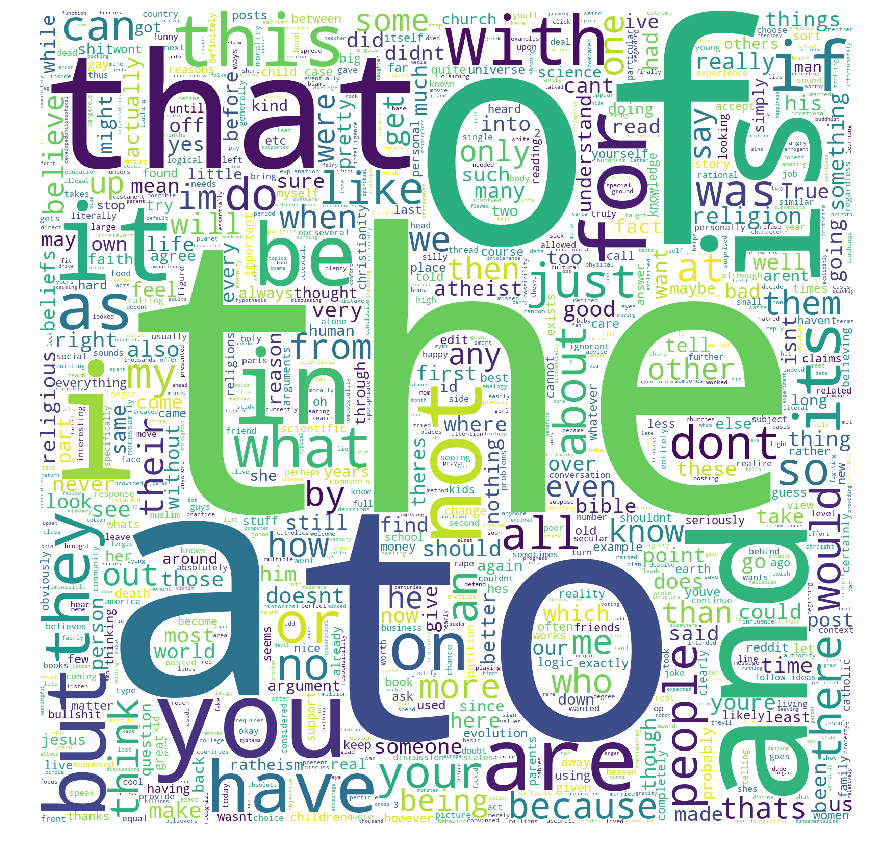

In [9]:
wc = WordCloud(background_color="white", max_words=1000, width=1600, height=1600).generate_from_frequencies(_word)
plt.figure(figsize = [15, 15])
plt.imshow(wc)
plt.axis("off")
plt.show()